## Neural Networks for Classification of Emotions

- CNN을 통해 사람의 얼굴의 특징을 추출하고 예측하여 현재 사람의 감정을 추측 할 수 있다.
- 감정 종류: 분노, 기쁨, 분노, 공포, 기본
- 활용 분야: AI비서, 거짓말 탐지, 졸음운전 방지, 온라인 강의 관심도 체크 등등


In [1]:
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow .keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns # 데이터 시각화
import matplotlib.pyplot as plt # 그래프 생성
tf.__version__

'2.15.0'

### Loading the Images
- zip 파일 내부 구조 살펴보기
  - fer2013
    - trian: 학습 이미지
    - validation: 검증 이미지
    - README : 안내서
    - fer2013.bib : 데이터 셋의 작가, 정보, 출처 등
    - fer2013.csv: 학습 이미지를 이용하여 추출한 특징들을 따로 csv로 저장해둠 -> 굳이 처음부터 이미지를 학습 시킬 필요는 없음

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/Project/Computer Vision/src/Datasets/fer_images.zip'
zip_object = zipfile.ZipFile(file= path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

### Train and test set 불러오기

In [4]:
training_generator = ImageDataGenerator(rescale= 1./255,
                                        rotation_range=7,
                                        horizontal_flip =True,
                                        zoom_range=0.2)
train_dataset = training_generator.flow_from_directory('/content/fer2013/train',
                                                       target_size = (48, 48),
                                                       batch_size = 16,
                                                       class_mode ='categorical',
                                                       shuffle = True)

Found 28709 images belonging to 7 classes.


In [5]:
train_dataset.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [7]:
# retrun_counts = true이면 각각의 도메인 값의 개수도 알려준다.
np.unique(train_dataset.classes,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([3995,  436, 4097, 7215, 4965, 4830, 3171]))

In [9]:
train_dataset.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

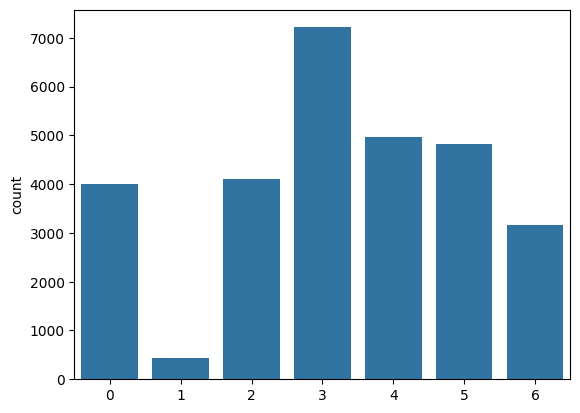

In [10]:
sns.countplot(x=train_dataset.classes);

In [11]:
test_generator = ImageDataGenerator(1./255)
test_dataset = test_generator.flow_from_directory('/content/fer2013/validation',
                                                  target_size = (48, 48),
                                                  batch_size =1,
                                                  class_mode = 'categorical',
                                                  shuffle = False)

Found 3589 images belonging to 7 classes.
